In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import anndata as ad
import seaborn as sns
import utils

In [2]:
# load the stereo data
data_list = []
for data in os.listdir("../Result/Anndata/Data_annotation/"):
    if "annotation" in data:
        tmp = sc.read_h5ad("../Result/Anndata/Data_annotation/{}".format(data))
        data_list.append(tmp)
        print(data)
merge = ad.concat(data_list, join = "outer")

B01806B5_annotation.h5ad
B02008C6_annotation.h5ad
B02009F6_annotation.h5ad
B01809A3_annotation.h5ad
B01806B6_annotation.h5ad
D02175A4_annotation.h5ad
A02092E1_annotation.h5ad
D02175A6_annotation.h5ad
B01809A4_annotation.h5ad
B01809C2_annotation.h5ad
B02008D2_annotation.h5ad
C02248B5_annotation.h5ad


/work/ygong/conda-envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/work/ygong/conda-envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
np.median(merge.obs["n_genes_by_counts"])

767.0

In [4]:
merge.obs

,diagnosis,orig.ident,x,y,sample_ID,Data,projid,broad.cell.type,Subcluster,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,Anno
16965120826600,control,sample,3950.0,7400.0,B01806B5,Stereo,NaN,NaN,NaN,455,734.0,76.0,10.354223,0,Ex
17179869196900,control,sample,4000.0,12900.0,B01806B5,Stereo,NaN,NaN,NaN,426,670.0,45.0,6.716418,1,Ex
17394617554900,control,sample,4050.0,6100.0,B01806B5,Stereo,NaN,NaN,NaN,563,849.0,59.0,6.949352,8,Inh
17394617557400,control,sample,4050.0,8600.0,B01806B5,Stereo,NaN,NaN,NaN,822,1354.0,72.0,5.317578,11,End
17394617558300,control,sample,4050.0,9500.0,B01806B5,Stereo,NaN,NaN,NaN,669,1148.0,99.0,8.623693,0,Ex
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66142496369550,case,sample,15400.0,11150.0,C02248B5,Stereo,NaN,NaN,NaN,401,601.0,47.0,7.820300,0,Ex
89979564865450,case,sample,20950.0,14250.0,C02248B5,Stereo,NaN,NaN,NaN,452,708.0,46.0,6.497175,0,Ex
47674136998800,case,sample,11100.0,13200.0,C02248B5,Stereo,NaN,NaN,NaN,466,709.0,36.0,5.077574,2,Ex
49606872287600,case,sample,11550.0,18800.0,C02248B5,Stereo,NaN,NaN,NaN,401,587.0,37.0,6.303237,0,Ex


/work/ygong/conda-envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


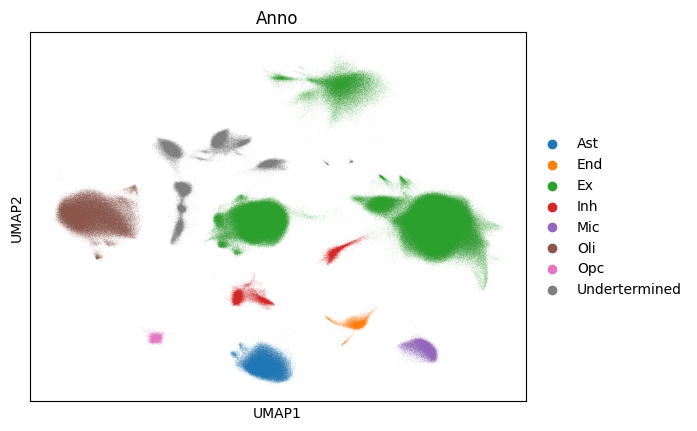

In [5]:
sc.pl.umap(merge, color = ["Anno"])

In [5]:
# check the DE for the excitatory neruons
sc.tl.rank_genes_groups(merge, 'Anno', method='t-test', groups = ["Ex"])

In [8]:
DEtable = utils.DE_table(merge, gene_numbers = 10)
DEtable[DEtable["Gene_name"] == "SYT1"]

,index,Group_key,Gene_name,Value,P_adjusted


In [37]:
sc.pl.violin(merge, [""], groupby = "Anno", jitter = 0)

KeyError: "Could not find keys '['GABA']' in columns of `adata.obs` or in adata.raw.var_names."

In [6]:
merge.obs_names_make_unique()

In [7]:
merge = merge[merge.obs["Anno"] == "Ex"]

In [8]:
# set the threshold for the mitochondria
sample_list = merge.obs["sample_ID"].unique().tolist()
mt_list = []
for sample in sample_list:
    tmp = merge[merge.obs["sample_ID"] == sample]
    tmp_mt_count = tmp.obs["pct_counts_mt"].tolist()
    mt_list.append(tmp_mt_count)

In [9]:
mt_list = pd.DataFrame(mt_list)
mt_list = mt_list.T
mt_list.columns = sample_list

In [10]:
# set the sample ordering
list_order = ["D02175A4", "D02175A6", "B01809A3", "B01809A4", "B01806B5", "B01806B6",
              "B02008D2", "B02009F6", "B01809C2", "C02248B5", "A02092E1", "B02008C6"]

In [11]:
mt_list = mt_list[list_order]

/work/ygong/conda-envs/st/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


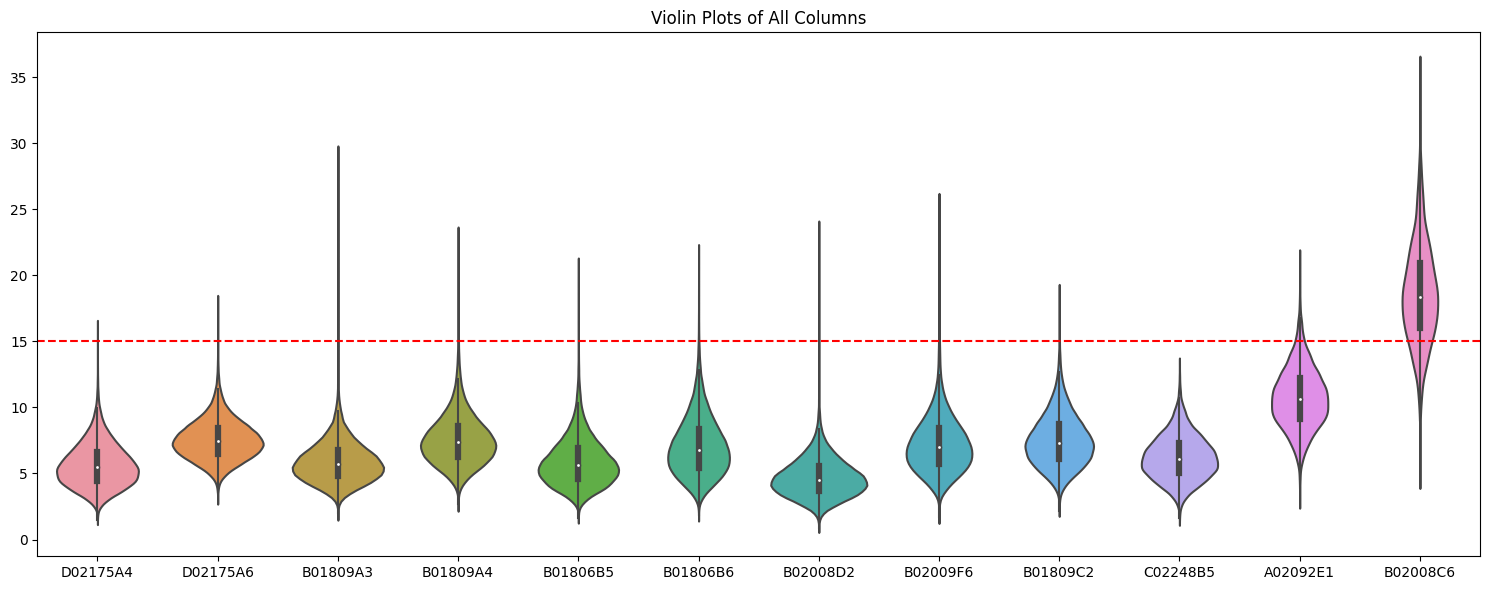

In [12]:
# Plot the gene mitochondria gene expression
plt.figure(figsize=(15, 6))

# Creating a single axes object
ax = plt.gca()

# Creating violin plots on the same axes object
sns.violinplot(data = mt_list, ax=ax)

threshold = 15  # Example threshold value
ax.axhline(threshold, color='red', linestyle='--')

plt.title('Violin Plots of All Columns')
plt.tight_layout()
plt.show()

In [15]:
# check the proportion in different group
levels = {"control": ["D02175A4", "D02175A6", "B01809A3", "B01809A4", "B01806B5", "B01806B6"],
          "moderate": ["B02008D2", "B02009F6"],
          "advanced": ["B01809C2", "C02248B5"],
          "severe": ["A02092E1", "B02008C6"]}

sample_to_level = {sample_id: level for level, sample_ids in levels.items() for sample_id in sample_ids}
merge.obs['level'] = merge.obs['sample_ID'].map(sample_to_level)

In [17]:
# we will choose the neuron location with high mitochondria
# Check the cells with high mito
merge.obs['MT_category'] = merge.obs['pct_counts_mt'].apply(lambda x: 'high' if x > 15 else 'low')
merge.obs['MT_category'].value_counts()

low     662663
high      4294
Name: MT_category, dtype: int64

In [18]:
meta_data = merge.obs.copy()

In [36]:
sub = meta_data[meta_data["level"] == "control"]
sub["MT_category"].value_counts(sort = False)[1]/sub.shape[0]

0.0013161694838278706

In [37]:
sub = meta_data[meta_data["level"] == "moderate"]
sub["MT_category"].value_counts(sort = False)[1]/sub.shape[0]

0.005883373685123824

In [38]:
sub = meta_data[meta_data["level"] == "advanced"]
sub["MT_category"].value_counts(sort = False)[1]/sub.shape[0]

0.0008565895322276293

In [39]:
sub = meta_data[meta_data["level"] == "severe"]
sub["MT_category"].value_counts(sort = False)[1]/sub.shape[0]

0.7528185131813173

In [18]:
high_mt_Ex = merge[merge.obs["MT_category"] == "high"]

In [36]:
# Perform the DE analysis of the low and high mito Ex
sc.tl.rank_genes_groups(merge, 'MT_category', method='t-test', groups = ["high"])
mito_high = utils.DE_table(merge, gene_numbers = 20)["Gene_name"].tolist()

sc.tl.rank_genes_groups(merge, 'MT_category', method='t-test', groups = ["low"])
mito_low = utils.DE_table(merge, gene_numbers = 20)["Gene_name"].tolist()

mito_gene = mito_high + mito_low

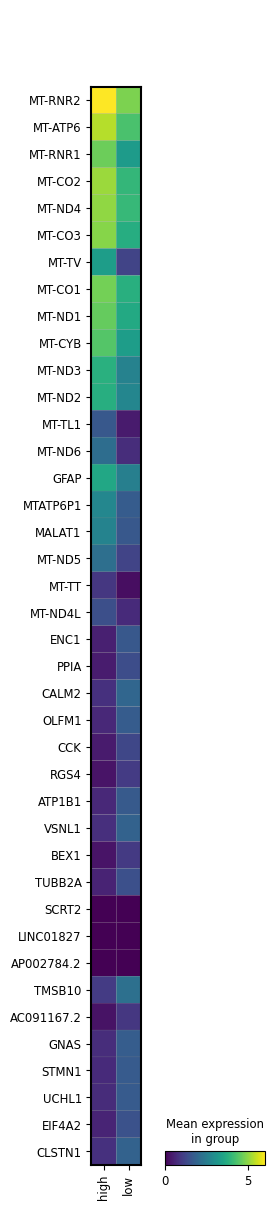

In [37]:
sc.pl.matrixplot(
    merge, 
    mito_gene, 
    groupby = "MT_category", 
    cmap='viridis', 
    dendrogram=True,
    swap_axes=True
)

In [29]:
# plot the figure
B01809A3 = merge[merge.obs["sample_ID"] == "B01809A3"]

In [30]:
df = B01809A3.obs.copy()

In [31]:
df["Anno"].value_counts()

Ex               55056
Oli              25325
Undertermined     9642
Ast               8550
Mic               4256
Inh               2660
End               1251
Opc                433
Name: Anno, dtype: int64

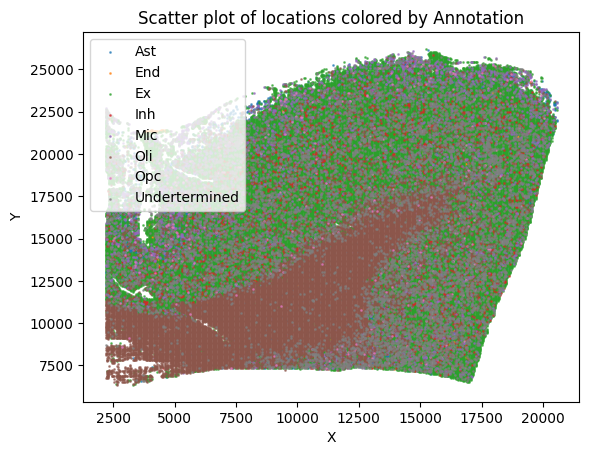

In [32]:
# Plotting
fig, ax = plt.subplots()
for label, df_group in df.groupby('Anno'):
    ax.scatter(df_group.x, df_group.y, label=label, s=1, alpha=0.6)

ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('Scatter plot of locations colored by Annotation')
plt.show()

View of AnnData object with n_obs × n_vars = 666957 × 4541
    obs: 'diagnosis', 'orig.ident', 'x', 'y', 'sample_ID', 'Data', 'projid', 'broad.cell.type', 'Subcluster', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Anno'
    uns: 'Anno_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'